<a href="https://colab.research.google.com/github/mday2148/learning/blob/master/11_19_Colab_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# example to use colab for cloud computing
import numpy as np
import pandas as pd
import sys
import os

In [3]:
print('The existing path is' + os.getcwd())


The existing path is/content


In [20]:
# read as dataframe
# filename must be matched
import io
option_df=pd.read_csv('Option2017_2_Clean.csv')
print(option_df.columns)
print(option_df.head())
print(option_df.describe())

Index(['Unnamed: 0', 'ExpDate', 'StrikePrice', 'Ticker', 'Type', 'Last', 'Chg',
       'Bid', 'Ask', 'Vol', 'Open Int', 'Delta', 'Gamma', 'Rho', 'Theta',
       'Vega', 'Implied volatility', 'currentDate', 'Underlaying asset price',
       'Expiration Date'],
      dtype='object')
   Unnamed: 0    ExpDate  ...  Underlaying asset price Expiration Date
0           0  17-Mar-17  ...                21.709999        0.076660
1           1  21-Apr-17  ...                21.709999        0.172485
2           2  21-Apr-17  ...                21.709999        0.172485
3           3  21-Apr-17  ...                21.709999        0.172485
4           4  21-Apr-17  ...                21.709999        0.172485

[5 rows x 20 columns]
        Unnamed: 0  StrikePrice  ...  Underlaying asset price  Expiration Date
count  7601.000000  7601.000000  ...              7601.000000      7601.000000
mean   3800.000000   212.891383  ...               215.601181         0.239800
std    2194.364031   283.894187 

In [22]:
# drop column
option_df = option_df.drop(labels=[option_df.columns[0]], axis=1)
filename = 'Option2017_clean_.csv'
option_df.to_csv(filename)
if os.path.isfile(filename):
  print(filename + " is saved in " + os.getcwd()+'\n')

Option2017_clean_.csv is saved in /content



In [0]:
# import visualization packages
import matplotlib as mpl
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time
from scipy.interpolate import griddata

In [24]:
# visualize AAPL's implied volatility
AAPL_option_data = option_df[option_df['Ticker']=='AAPL']
AAPL_option_data = AAPL_option_data.dropna()

print(AAPL_option_data.shape)
filename='AAPL_option_data_2017.csv'
AAPL_option_data.to_csv(filename)
if os.path.isfile(filename):
  print(filename + " is saved in " + os.getcwd()+'\n')
else:
  print('Error: Cannot find file\n')

(279, 18)
AAPL_option_data_2017.csv is saved in /content



In [25]:
AAPL_option_data.head()

,StrikePrice,Ticker,Type,Last,Chg,Bid,Ask,Vol,Open Int,Delta,Gamma,Rho,Theta,Vega,Implied volatility,currentDate,Underlaying asset price,Expiration Date
2209,123.0,AAPL,Call,12.55,-0.06,12.50,12.95,5.0,92.0,1.0,0.0,0.02339,-0.01881,0.0,0.37750,2/17/2017,135.720001,0.019165
2210,126.0,AAPL,Call,9.45,-0.05,9.55,9.90,7.0,1023.0,1.0,0.0,0.02396,-0.01927,0.0,0.31360,2/17/2017,135.720001,0.019165
2211,127.0,AAPL,Call,8.50,-0.02,8.60,8.80,30.0,378.0,1.0,0.0,0.02415,-0.01943,0.0,0.25110,2/17/2017,135.720001,0.019165
2212,128.0,AAPL,Call,7.55,0.15,7.55,7.85,59.0,533.0,1.0,0.0,0.02434,-0.01958,0.0,0.22892,2/17/2017,135.720001,0.019165
2213,130.0,AAPL,Call,5.68,0.28,5.55,5.95,379.0,1958.0,1.0,0.0,0.02473,-0.01989,0.0,0.20144,2/17/2017,135.720001,0.019165


In [0]:
# create meshgrid
AAPL_data = AAPL_option_data
strike_price = AAPL_data['StrikePrice']
implied_volatility=AAPL_data['Implied volatility']
expiration_time = AAPL_data['Expiration Date']

In [31]:
AAPL_data.head()

,StrikePrice,Ticker,Type,Last,Chg,Bid,Ask,Vol,Open Int,Delta,Gamma,Rho,Theta,Vega,Implied volatility,currentDate,Underlaying asset price,Expiration Date
2209,123.0,AAPL,Call,12.55,-0.06,12.50,12.95,5.0,92.0,1.0,0.0,0.02339,-0.01881,0.0,0.37750,2/17/2017,135.720001,0.019165
2210,126.0,AAPL,Call,9.45,-0.05,9.55,9.90,7.0,1023.0,1.0,0.0,0.02396,-0.01927,0.0,0.31360,2/17/2017,135.720001,0.019165
2211,127.0,AAPL,Call,8.50,-0.02,8.60,8.80,30.0,378.0,1.0,0.0,0.02415,-0.01943,0.0,0.25110,2/17/2017,135.720001,0.019165
2212,128.0,AAPL,Call,7.55,0.15,7.55,7.85,59.0,533.0,1.0,0.0,0.02434,-0.01958,0.0,0.22892,2/17/2017,135.720001,0.019165
2213,130.0,AAPL,Call,5.68,0.28,5.55,5.95,379.0,1958.0,1.0,0.0,0.02473,-0.01989,0.0,0.20144,2/17/2017,135.720001,0.019165


In [42]:
# sampling
N_ = len(np.unique(np.array(strike_price)))
print('Total different strike prices: ' + str(N_))

# strike price
x = np.linspace(min(strike_price), max(strike_price), N_)

# expiration time
M_ = len(np.unique(np.array(expiration_time)))
print(M_)

y=np.linspace(min(expiration_time), max(expiration_time), M_)

## 2D meshgrid
X,Y=np.meshgrid(x, y)


Total different strike prices: 26
14


In [0]:
# interplolation
# visualize implied_volatility--> we need to interpolize here (because not all info is known!)
Z = griddata((strike_price, expiration_time), implied_volatility, (X,Y), method='cubic')
t_idx = ~np.isnan(z)
## normalize z vector to get CM for color map input
CM = (Z-Z[t_idx].mean())/(Z[t_idx].max())

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  """


AAPL_IVS.tiff is saved!

AAPL_IVS.tiff


----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 59474, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

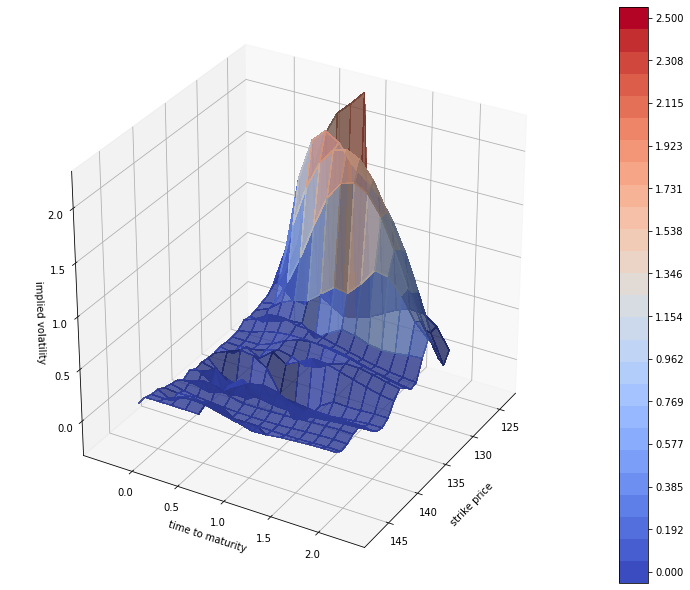

In [68]:
fig=plot.figure(figsize = (10,8))
ax = Axes3D(fig)
# use diverging colormap
surf = ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=cm.coolwarm(CM),
                      edgecolor='r', linewidth=0.5, antialiased=False, alpha=0.8)
ax.set_xlabel('strike price', fontsize=10, labelpad=10)
ax.set_ylabel('time to maturity', fontsize=10)
ax.set_zlabel('implied volatility', fontsize=10)
ax.set_xlim([strike_price.min()-0.5, strike_price.max()+0.5])
ax.set_ylim([expiration_time.min()-0.5, expiration_time.max()+0.5])
ax.view_init(azim=30)

# add colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=2.5)
sm=plot.cm.ScalarMappable(cmap=cm.coolwarm,norm=norm)
sm.set_array([])
plot.colorbar(sm, ticks=np.linspace(0,2.5,14), boundaries=np.arange(-0.05, 2.6, .1))

# use tiff instead of eps
filename='AAPL_IVS.tiff'
plot.savefig(filename,format='tiff', dpi=600)
print(filename + ' is saved!\n')

# We need to download that file to our local computer
from google.colab import files
print(filename)
files.download(filename)